### Name: Hemesh Sawakar (C74) 

###### Program: upGrad and IIITB Machine Learning & AI Program | Course: SQL and Statistics Essentials


# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet("D:/Learnings/UpGrad/AI & ML main course/Site material/C1- SQL & Stats/4. EDA/New York taxi case/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet")
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [312]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [313]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pyarrow.parquet as pq
from datetime import datetime
import pandas as pd
# Select the folder having data files
os.chdir('D:/Learnings/UpGrad/AI & ML main course/Site material/C1- SQL & Stats/4. EDA/New York taxi case/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/')

# Create a list of all the twelve files to read
file_list = sorted([f for f in os.listdir() if f.endswith('.parquet')])

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
# Process each monthly file
for file_name in file_list:
    try:
        print(f"Processing file: {file_name}")
        # Read parquet file (in chunks if needed later)
        table = pq.read_table(file_name)
        df_month = table.to_pandas()

        # Ensure the timestamp column is in datetime format

        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Extract date and hour for grouping
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # Initialize temporary DataFrame to store monthly samples
        df_month_sampled = pd.DataFrame()

        # Group by date and hour
        for (d, h), group in df_month.groupby(['date', 'hour']):
            sampled = group.sample(frac=0.05, random_state=42)  # Set seed for reproducibility
            df_month_sampled = pd.concat([df_month_sampled, sampled], ignore_index=True)

        # Append monthly samples to final DataFrame
        df = pd.concat([df, df_month_sampled], ignore_index=True)


    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [7]:
# Store the df in csv/parquet
df.to_parquet('D:/Learnings/UpGrad/AI & ML main course/Site material/C1- SQL & Stats/4. EDA/New York taxi case/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/final_sampled_data.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [129]:
# Load the new data file
df = pd.read_parquet('D:/Learnings/UpGrad/AI & ML main course/Site material/C1- SQL & Stats/4. EDA/New York taxi case/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/final_sampled_data.parquet')

In [130]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.58           0.0   
3             2  ...      0.5        0.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   

         date  hour Airport_fee  
0  2022-12-31    23         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [132]:
# Fix the index and drop any columns that are not needed
df = df.drop(['date', 'hour'], axis=1)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [133]:
# Combine the two airport fee columns
df['airport_fees'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)

# dropping original columns as we have create ur final column
df.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [134]:
# check where values of fare amount are negative
negative_fare_amount = df[df['fare_amount'] < 0]
print(negative_fare_amount)

# shows that there are no negative fare amounts

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fees]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [135]:
# Analyse RatecodeID for the negative fare amounts
negative_ratecodeID = df[df['RatecodeID'] < 0]
print(negative_ratecodeID)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fees]
Index: []


In [136]:
# Find which columns have negative values

df[df['total_amount'] < 0]

# total_amount has negative values. It also revealed that mta_tax, improvement_surcharge, congestio_surcharge, airport_fees also negative values.
#careful observation on other columns shows that column 'extra' also has some negative values.
#tolls_amount and tip_amount do not have any negative values

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3966            2  2023-01-02 05:12:19   2023-01-02 05:41:45              1.0   
9093            2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
77200           2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
77920           2  2023-01-17 15:03:44   2023-01-17 15:36:28              1.0   
86509           2  2023-01-19 09:50:26   2023-01-19 09:58:13              1.0   
...           ...                  ...                   ...              ...   
1734702         2  2023-07-27 17:56:27   2023-07-27 18:00:12              1.0   
1742776         2  2023-07-29 03:47:56   2023-07-29 03:48:34              4.0   
1762681         2  2023-09-02 18:29:48   2023-09-02 18:30:13              3.0   
1774112         2  2023-09-05 15:32:01   2023-09-05 15:43:35              1.0   
1893750         2  2023-09-30 16:35:07   2023-09-30 16:35:13              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3966             17.07         3.0                  N           142   
9093              0.00         2.0                  N           132   
77200            17.68         2.0                  N           230   
77920             4.12         1.0                  N           239   
86509             0.50         1.0                  N           161   
...                ...         ...                ...           ...   
1734702           0.66         1.0                  N           113   
1742776           0.00         5.0                  N            79   
1762681           0.00         2.0                  N            74   
1774112           0.01         1.0                  N           161   
1893750           0.00         5.0                  N           141   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3966                1             2          0.0    0.0      0.0         0.0   
9093              132             2          0.0    0.0     -0.5         0.0   
77200             132             2          0.0    0.0     -0.5         0.0   
77920             168             2          0.0    0.0     -0.5         0.0   
86509              43             2          0.0    0.0     -0.5         0.0   
...               ...           ...          ...    ...      ...         ...   
1734702           234             2          0.0    0.0     -0.5         0.0   
1742776            79             4          0.0    0.0      0.0         0.0   
1762681            74             2          0.0    0.0     -0.5         0.0   
1774112           170             2          0.0    0.0     -0.5         0.0   
1893750           141             2          0.0    0.0      0.0         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
3966              0.0                   -1.0         -1.00   
9093              0.0                   -1.0         -5.25   
77200             0.0                   -1.0         -4.00   
77920             0.0                   -1.0         -4.00   
86509             0.0                   -1.0         -4.00   
...               ...                    ...           ...   
1734702           0.0                   -1.0         -4.00   
1742776           0.0                   -1.0         -3.50   
1762681           0.0                   -1.0         -1.50   
1774112           0.0                   -1.0         -4.00   
1893750           0.0                   -1.0         -3.50   

         congestion_surcharge  airport_fees  
3966                      0.0          0.00  
9093                     -2.5         -1.25  
77200                    -2.5          0.00  
77920                    -2.5          0.00  
86509                    -2.5          0.00  
...                       ...           ...  
1734702                  -2.5          0.00  
1742776                  -2.5          0.00  
1762681                   0.0          0.00  
1774112          

In [137]:
df[df['extra'] == -2.50]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
300725         2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
300725            0.0         1.0                  N           265   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
300725           265             2          3.0   -2.5      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
300725           0.0                    1.0           4.0   

        congestion_surcharge  airport_fees  
300725                   0.0           0.0

In [138]:
# fix these negative values
cols_to_fix = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fees', 'total_amount']
df[cols_to_fix] = df[cols_to_fix].abs()


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [139]:
# Find the proportion of missing values in each column
df.isnull().sum()
# passenger counts, RatecodeID, store_and_fwd_flag, congesion_surcharge have 64874 null values which is 3.5% of total records 1,896,400

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
store_and_fwd_flag       64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
airport_fees                 0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [140]:
# Display the rows with null values
df[df.isnull().any(axis=1)]
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

In [141]:
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df[df.isnull().any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
16              2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
43              2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
44              2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
47              2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              1.0   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              1.0   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              1.0   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              1.0   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
5                19.24         NaN               None            66   
16               10.77         NaN               None           151   
43                4.52         NaN               None           114   
44                9.19         NaN               None           239   
47                2.74         NaN               None            90   
...                ...         ...                ...           ...   
1896343           0.00         NaN               None            43   
1896356           0.00         NaN               None           255   
1896369           0.00         NaN               None           137   
1896376           3.50         NaN               None           233   
1896387           0.00         NaN               None           231   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
5                 107             0        25.64    0.0      0.5        5.93   
16                106             0        45.38    0.0      0.5       11.19   
43                262             0        25.38    0.0      0.5        0.00   
44                256             0        40.00    0.0      0.5        2.20   
47                 48             0        18.48    0.0      0.5        3.37   
...               ...           ...          ...    ...      ...         ...   
1896343           229             0        12.55    0.0      0.5        0.00   
1896356           209             0        34.02    0.0      0.5        0.00   
1896369           249             0        21.50    0.0      0.5        0.00   
1896376           144             0        21.28    0.0      0.5        0.00   
1896387            90             0        15.68    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
5                0.00                    1.0         35.57   
16               6.55                    1.0         67.12   
43               0.00                    1.0         29.38   
44               0.00                    1.0         46.20   
47               0.00                    1.0         25.85   
...               ...                    ...           ...   
1896343          0.00                    1.0         16.55   
1896356          0.00                    1.0         38.02   
1896369          0.00                    1.0         25.50   
1896376          0.00                    1.0         25.28   
1896387          0.00                    1.0         19.68   

         congestion_surcharge  airport_fees  
5                         NaN           0.0  
16                        NaN           0.0  
43                        NaN           0.0  
44                        NaN           0.0  
47                        NaN           0.0  
...                       ...           ...  
1896343                   NaN           0.0  
1896356                   NaN           0.0  
1896369                   NaN           0.0  
1896376          

In [142]:
df[(df['passenger_count']>0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.86         1.0                  N           141   
1                 7.74         1.0                  N           138   
2                 1.24         1.0                  N           161   
3                 1.44         1.0                  N           237   
4                 0.54         1.0                  N           143   
...                ...         ...                ...           ...   
1896395           0.79         1.0                  N           231   
1896396           0.50         1.0                  N           158   
1896397           1.09         1.0                  N           161   
1896398          13.20         1.0                  N           164   
1896399           2.97         1.0                  N           231   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 140             1          6.5    1.0      0.5        2.00   
1                 256             2         32.4    6.0      0.5        0.00   
2                 237             1          7.9    1.0      0.5        2.58   
3                 141             2         11.4    1.0      0.5        0.00   
4                 142             2          6.5    1.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896395           231             1          8.6    1.0      0.5        2.00   
1896396            68             1          5.8    3.5      0.5        2.15   
1896397           162             1          9.3    1.0      0.5        2.86   
1896398            14             2         54.8    3.5      0.5        0.00   
1896399            68             1         17.0    1.0      0.5        4.40   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         13.50   
1                 0.0                    1.0         41.15   
2                 0.0                    1.0         15.48   
3                 0.0                    1.0         16.40   
4                 0.0                    1.0         11.50   
...               ...                    ...           ...   
1896395           0.0                    1.0         15.60   
1896396           0.0                    1.0         12.95   
1896397           0.0                    1.0         17.16   
1896398           0.0                    1.0         59.80   
1896399           0.0                    1.0         26.40   

         congestion_surcharge  airport_fees  
0                         2.5          0.00  
1                         0.0          1.25  
2                         2.5          0.00  
3                         2.5          0.00  
4                         2.5          0.00  
...                       ...           ...  
1896395                   2.5          0.00  
1896396                   2.5          0.00  
1896397                   2.5          0.00  
1896398          

In [143]:
# replacing 0 passenger_count with nulls first 
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [144]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
#since the RatecodeID is a catagorical column it is general practice to replace nulls in catagorical column with mode values and numeric values wih mean/median

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [145]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [146]:
# Handle any remaining missing values

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fees             0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [147]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

# passenger max count of 9 seems unreal as taxis are 5 seater if sedan and 7 seater if SUVs
# trip_distance, total_amount feel like outlier from difference in their max and 75th percentile

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.372236e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.644038e-01   1.294085e+02  7.267261e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990529e-01  2.898216e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.835735e-02  1.064161e+02   

       congestion_surcharge  airport_fees  
count          1.896400e+06  1.896400e+06  
mean           2.314256e+00  1.380348e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.556359e-01  4.575819e-01

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [148]:
# remove passenger_count > 6
df = df[~(df['passenger_count'] > 6)]
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896379e+06                     1896379                     1896379   
mean   1.733023e+00  2023-07-02 19:59:19.028937  2023-07-02 20:16:45.020354   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 16:09:36         2023-04-02 16:27:32   
50%    2.000000e+00         2023-06-27 15:43:31         2023-06-27 16:00:53   
75%    2.000000e+00         2023-10-06 19:37:07  2023-10-06 19:53:20.500000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476417e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896379e+06   1.896379e+06  1.896379e+06  1.896379e+06   
mean      1.372162e+00   3.858274e+00  1.612944e+00  1.652813e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.641241e-01   1.294093e+02  7.267292e+00  6.400031e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896379e+06  1.896379e+06  1.896379e+06  1.896379e+06  1.896379e+06   
mean   1.640513e+02  1.163817e+00  1.991864e+01  1.588037e+00  4.953199e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980194e+01  5.081399e-01  1.055374e+02  1.829197e+00  4.845034e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896379e+06  1.896379e+06           1.896379e+06  1.896379e+06   
mean   3.546942e+00  5.965016e-01           9.990529e-01  2.898137e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054757e+00  2.187772e+00           2.835751e-02  1.064165e+02   

       congestion_surcharge  airport_fees  
count          1.896379e+06  1.896379e+06  
mean           2.314274e+00  1.380345e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.556071e-01  4.575812e-01

In [149]:
df[(df['trip_distance']<1)]
# we can see the trip distance nearly 0 but fare amounts are >300

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
4               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
10              1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
11              2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
13              2  2023-01-01 00:27:33   2023-01-01 00:36:38              2.0   
...           ...                  ...                   ...              ...   
1896386         2  2023-09-30 23:58:27   2023-10-01 00:06:53              1.0   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46              1.0   
1896390         2  2023-09-30 23:37:17   2023-09-30 23:46:07              1.0   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.86         1.0                  N           141   
4                 0.54         1.0                  N           143   
10                0.90         1.0                  N           148   
11                0.78         1.0                  N           237   
13                0.85         1.0                  N            90   
...                ...         ...                ...           ...   
1896386           0.84         1.0                  N           113   
1896387           0.00         1.0                  N           231   
1896390           0.86         1.0                  N           164   
1896395           0.79         1.0                  N           231   
1896396           0.50         1.0                  N           158   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 140             1         6.50    1.0      0.5        2.00   
4                 142             2         6.50    1.0      0.5        0.00   
10                114             1         7.90    3.5      0.5        1.00   
11                229             2         7.20    1.0      0.5        0.00   
13                 68             1        10.00    1.0      0.5        3.75   
...               ...           ...          ...    ...      ...         ...   
1896386            68             1         9.30    1.0      0.5        2.86   
1896387            90             0        15.68    0.0      0.5        0.00   
1896390           233             2         9.30    1.0      0.5        0.00   
1896395           231             1         8.60    1.0      0.5        2.00   
1896396            68             1         5.80    3.5      0.5        2.15   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         13.50   
4                 0.0                    1.0         11.50   
10                0.0                    1.0         13.90   
11                0.0                    1.0         12.20   
13                0.0                    1.0         18.75   
...               ...                    ...           ...   
1896386           0.0                    1.0         17.16   
1896387           0.0                    1.0         19.68   
1896390           0.0                    1.0         14.30   
1896395           0.0                    1.0         15.60   
1896396           0.0                    1.0         12.95   

         congestion_surcharge  airport_fees  
0                         2.5           0.0  
4                         2.5           0.0  
10                        2.5           0.0  
11                        2.5           0.0  
13                        2.5           0.0  
...                       ...           ...  
1896386                   2.5           0.0  
1896387                   2.5           0.0  
1896390                   2.5           0.0  
1896395          

In [150]:
# Continue with outlier handling
df=df[~( (df['trip_distance'] == 0) & (df['fare_amount'] > 300) )] # removing rows of trip distance 0 but fare_amount >300
df=df[~( (df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']) )] # removing rows of trip distance is 0 dof different zones 
df=df[~(df['trip_distance'] >250)] # removing trip_distance > 250 miles
df=df[~( (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']) )] # removing rows of fare is 0 dof different zones 
df.describe()

#so we have dropped nearly 22k records

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.874281e+06                     1874281                     1874281   
mean   1.739602e+00  2023-07-02 05:23:51.056848  2023-07-02 05:41:15.511754   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 02:33:40         2023-04-02 02:47:08   
50%    2.000000e+00         2023-06-26 14:12:05         2023-06-26 14:34:48   
75%    2.000000e+00         2023-10-06 03:04:30         2023-10-06 03:24:14   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.442171e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.874281e+06   1.874281e+06  1.874281e+06  1.874281e+06   
mean      1.375573e+00   3.483902e+00  1.563217e+00  1.653872e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.080000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.440000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   2.048600e+02  9.900000e+01  2.650000e+02   
std       8.674008e-01   4.543254e+00  6.933033e+00  6.391284e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.874281e+06  1.874281e+06  1.874281e+06  1.874281e+06  1.874281e+06   
mean   1.641138e+02  1.171835e+00  1.988143e+01  1.602447e+00  4.955281e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  1.425000e+01  4.000000e+00   
std    6.975992e+01  4.989228e-01  1.061243e+02  1.831343e+00  4.738638e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.874281e+06  1.874281e+06           1.874281e+06  1.874281e+06   
mean   3.578124e+00  5.972719e-01           9.993305e-01  2.899051e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.470000e+00  0.000000e+00           1.000000e+00  3.089000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.050347e+00  2.188609e+00           2.295932e-02  1.070052e+02   

       congestion_surcharge  airport_fees  
count          1.874281e+06  1.874281e+06  
mean           2.317282e+00  1.393513e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.506984e-01  4.595628e-01

In [151]:
df.info()

columns_to_process = ['fare_amount','extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge', 
                      'total_amount','congestion_surcharge', 'airport_fees']
df_cleaned = df.copy()

# Loop through each specified column to remove outliers
for column in columns_to_process:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows where the value in the column is outside the bounds
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1874281 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fees           floa

In [152]:
df_cleaned.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                  N            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         6.50    1.0      0.5        2.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fees  
0                    1.0         13.50                   2.5           0.0  
1                    1.0         15.48                   2.5           0.0  
2                    1.0         16.40                   2.5           0.0  
3                    1.0         11.50                   2.5           0.0  
4                    1.0         35.57                   2.5           0.0

In [153]:
# Do any columns need standardising?

#The data types of passenger_count, RatecodeID should be integer instead of float
df_cleaned = df_cleaned.astype({'passenger_count': int, 'RatecodeID': int})
df_cleaned.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86           1                  N           141           140   
1           1.24           1                  N           161           237   
2           1.44           1                  N           237           141   
3           0.54           1                  N           143           142   
4          19.24           1                  N            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         6.50    1.0      0.5        2.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fees  
0                    1.0         13.50                   2.5           0.0  
1                    1.0         15.48                   2.5           0.0  
2                    1.0         16.40                   2.5           0.0  
3                    1.0         11.50                   2.5           0.0  
4                    1.0         35.57                   2.5           0.0

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [154]:
df_cleaned.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fees']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [155]:
catagorical=[
 'VendorID',
 'RatecodeID',
 'store_and_fwd_flag',
 'payment_type'
]
numerical=[
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fees'
 'pickup_hour'
 'trip_duration'
]

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

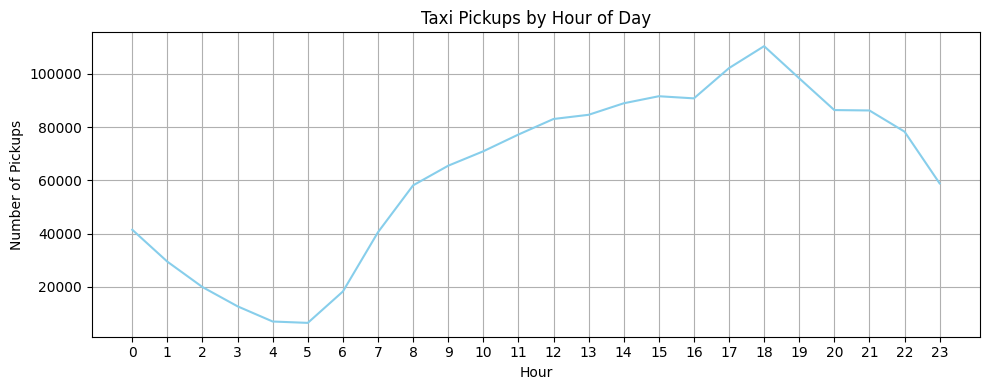

In [156]:
# Find and show the hourly trends in taxi pickups
df_trend = df_cleaned.copy()
df_trend['pickup_hour'] = df_cleaned['tpep_pickup_datetime'].dt.hour

df_trend['pickup_hour'].value_counts().sort_index().plot(kind='line', figsize=(10, 4), color='skyblue')
plt.title('Taxi Pickups by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(24))  # Show hours 0 through 23
plt.grid(True)
plt.tight_layout()
plt.show()

#The taxi pickup are generally high from 8 am to 11pm. Peak business hours are between 11 am to 9pm surging at 6pm.

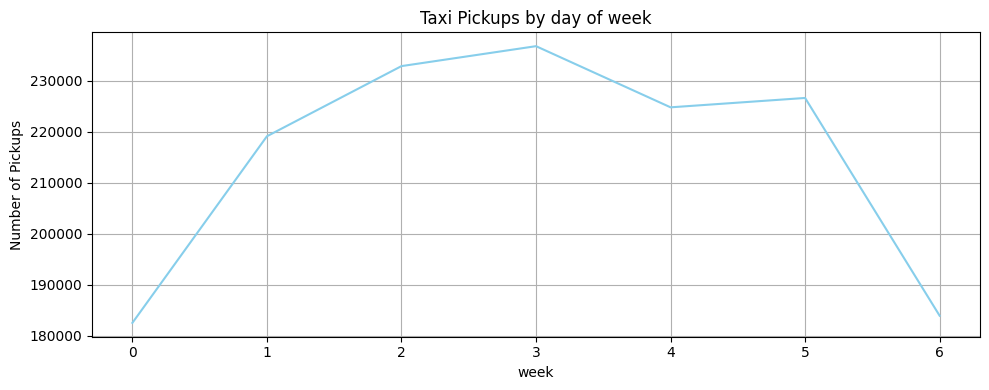

In [157]:
# Find and show the daily trends in taxi pickups (days of the week)

# Find and show the hourly trends in taxi pickups
df_trend = df_cleaned.copy()
df_trend['pickup_hour'] = df_cleaned['tpep_pickup_datetime'].dt.dayofweek  

df_trend['pickup_hour'].value_counts().sort_index().plot(kind='line', figsize=(10, 4), color='skyblue')
plt.title('Taxi Pickups by day of week')
plt.xlabel('week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7)) 
plt.grid(True)
plt.tight_layout()
plt.show()

#The taxi pickups are lowest on Sunday followed by Monday. Taxi pickup are trending high from Tuesday to Friday.
# Wed Thu are almost identical showing highest business activity.

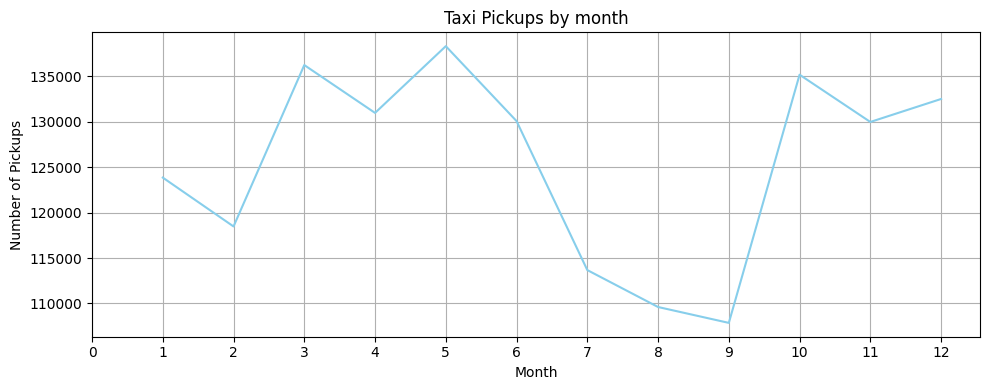

In [158]:
# Show the monthly trends in pickups

# Find and show the hourly trends in taxi pickups
df_trend = df_cleaned.copy()
df_trend['pickup_hour'] = df_cleaned['tpep_pickup_datetime'].dt.month  

df_trend['pickup_hour'].value_counts().sort_index().plot(kind='line', figsize=(10, 4), color='skyblue')
plt.title('Taxi Pickups by month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(13)) 
plt.grid(True)
plt.tight_layout()
plt.show()

#The taxi pickups are high during Mar,Apr,May,June and Oct,Nov,Dec
#July, Aug, Sep is where it is lower than trend

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [159]:
# Analyse the above parameters
df_cleaned.describe()
# We had removed the negative values using abs() function so there are no negative values. We can confirm with summary statistics

df_cleaned[(df_cleaned['trip_distance']<=0)]
# But there are 0 values in fare_amount, tip_amount and trip_distance
zero_count = (df_cleaned['trip_distance'] == 0).sum()
print(zero_count)

3783


In [160]:
df_cleaned[(df_cleaned['trip_distance']<=0)] # check for each of the mentioned columns
# There are 0 values in fare_amount, tip_amount and trip_distance
zero_fare_amount_count = (df_cleaned['fare_amount'] == 0).sum()
zero_tip_amount_count = (df_cleaned['tip_amount'] == 0).sum()
zero_trip_distance_count = (df_cleaned['trip_distance'] == 0).sum()
print("zero_fare_amount_count: ",zero_fare_amount_count)
print("zero_tip_amount_count: ",zero_tip_amount_count)
print("zero_trip_distance_count: ",zero_trip_distance_count)

zero_fare_amount_count:  48
zero_tip_amount_count:  315157
zero_trip_distance_count:  3783


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [161]:
# Create a df with non zero entries for the selected parameters.
df_filtered=df_cleaned.copy()
df_filtered=df_filtered[ ~((df_filtered['fare_amount']==0) | (df_filtered['tip_amount']==0) | (df_filtered['trip_distance']==0) )]

In [162]:
zero_fare_amount_count = (df_filtered['fare_amount'] == 0).sum()
zero_tip_amount_count = (df_filtered['tip_amount'] == 0).sum()
zero_trip_distance_count = (df_filtered['trip_distance'] == 0).sum()
print("zero_fare_amount_count: ",zero_fare_amount_count)
print("zero_tip_amount_count: ",zero_tip_amount_count)
print("zero_trip_distance_count: ",zero_trip_distance_count)

zero_fare_amount_count:  0
zero_tip_amount_count:  0
zero_trip_distance_count:  0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

   pickup_month  total_amount
0       2022-12         13.50
1       2023-01    2053397.56
2       2023-02    1988905.40
3       2023-03    2304651.79
4       2023-04    2189503.47
5       2023-05    2368691.17
6       2023-06    2213975.41
7       2023-07    1859521.08
8       2023-08    1788641.65
9       2023-09    1856774.91
10      2023-10    2357619.31
11      2023-11    2265680.59
12      2023-12    2211021.43


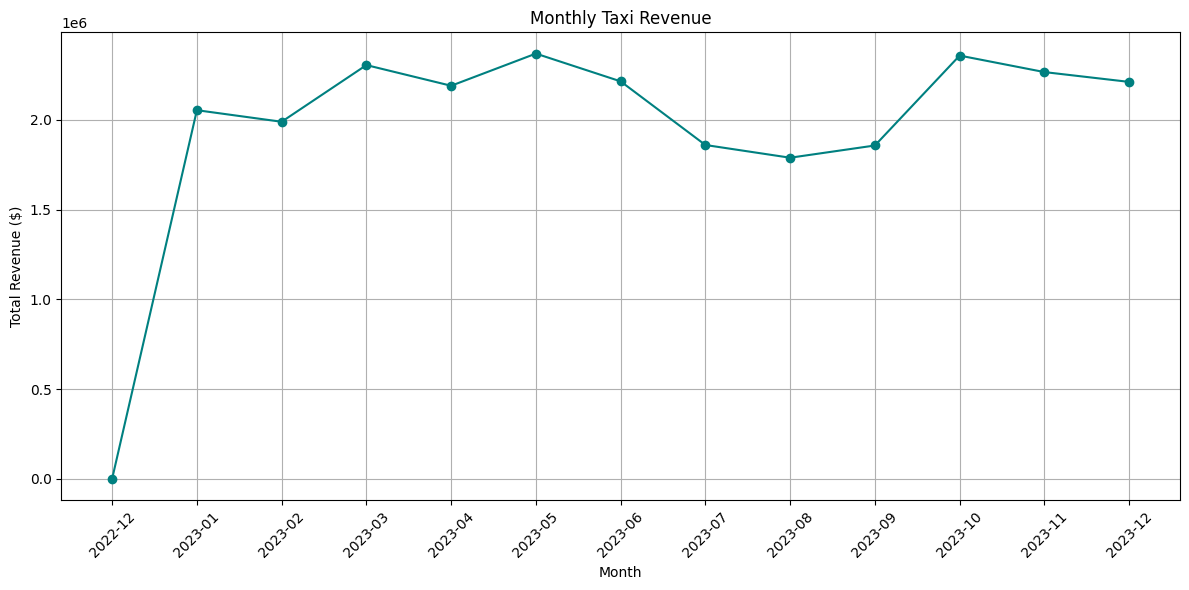

In [163]:
# Group data by month and analyse monthly revenue
df_trend=df_filtered.copy()
df_trend['pickup_month'] = df_filtered['tpep_pickup_datetime'].dt.to_period('M') 
monthly_revenue = df_trend.groupby('pickup_month')['total_amount'].sum().reset_index()
print(monthly_revenue)

monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(str)
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['pickup_month'], monthly_revenue['total_amount'], marker='o', color='teal')
plt.title('Monthly Taxi Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#monthly revenue shows fluctuating trend but Mar'23 to May'23 was a good revenue grossing period.
#It dropped during July to September but again came to peak high in Oct'23

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  pickup_quarter  total_amount
0         2022Q4         13.50
1         2023Q1    6346954.75
2         2023Q2    6772170.05
3         2023Q3    5504937.64
4         2023Q4    6834321.33


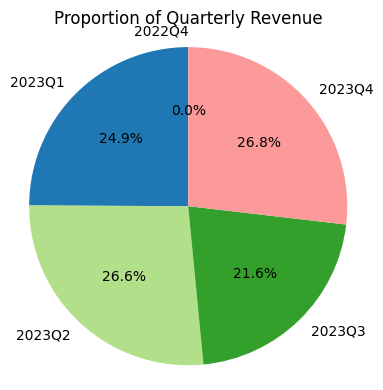

In [164]:
# Calculate proportion of each quarter

df_trend=df_filtered.copy()
df_trend['pickup_quarter'] = df_filtered['tpep_pickup_datetime'].dt.to_period('Q') 
quarterly_revenue = df_trend.groupby('pickup_quarter')['total_amount'].sum().reset_index()
print(quarterly_revenue)

labels = quarterly_revenue['pickup_quarter'].astype(str)
sizes = quarterly_revenue['total_amount']
# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Quarterly Revenue')
plt.axis('equal')  # Makes the pie chart a circle
plt.tight_layout()
plt.show()

# In all of the quarters the revenue earned is proportional. 2nd and 4th quarters are highest revenue earned quarters.

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

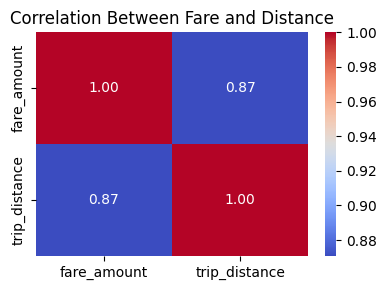

In [165]:
# Show how trip fare is affected by distance
df_corr=df_filtered[(df_filtered['trip_distance']!=0)].copy()
corr = df_corr[['fare_amount', 'trip_distance']].corr()

# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Fare and Distance")
plt.tight_layout()
plt.show()

del df_corr

# We can see fare_amount and trip_distnace are very correlated. so when trip_distance increases fare_amount increases

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

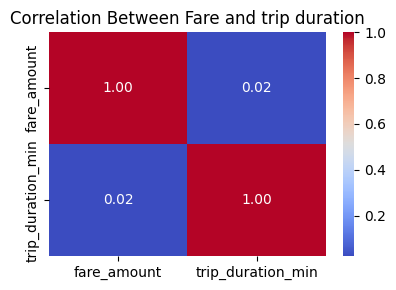

In [166]:
# Show relationship between fare and trip duration
df_filtered['trip_duration'] = df_filtered['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df_filtered['trip_duration_min'] = df_filtered['trip_duration'].dt.total_seconds() / 60

# Show how trip fare is affected by distance
df_corr=df_filtered.copy()
corr = df_corr[['fare_amount', 'trip_duration_min']].corr()

# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Fare and trip duration")
plt.tight_layout()
plt.show()

del df_corr

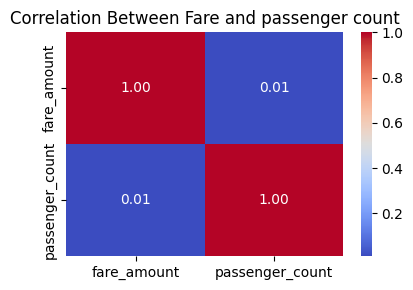

In [167]:
# Show relationship between fare and number of passengers
df_corr=df_filtered.copy()
corr = df_corr[['fare_amount', 'passenger_count']].corr()

# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Fare and passenger count")
plt.tight_layout()
plt.show()

del df_corr


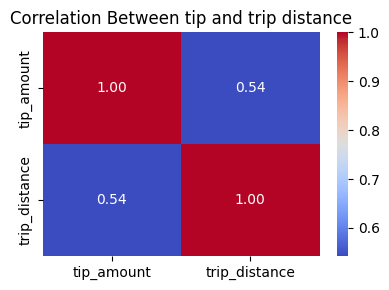

In [168]:
# Show relationship between tip and trip distance

df_corr=df_filtered.copy()
corr = df_corr[['tip_amount', 'trip_distance']].corr()

# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between tip and trip distance")
plt.tight_layout()
plt.show()

del df_corr

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

   payment_type  total_amount
0             0     718908.53
1             1   24738857.33
2             2        400.39
3             3         48.58
4             4        182.44
payment_type
1    0.793067
2    0.167990
0    0.027074
4    0.007182
3    0.004686
Name: proportion, dtype: float64


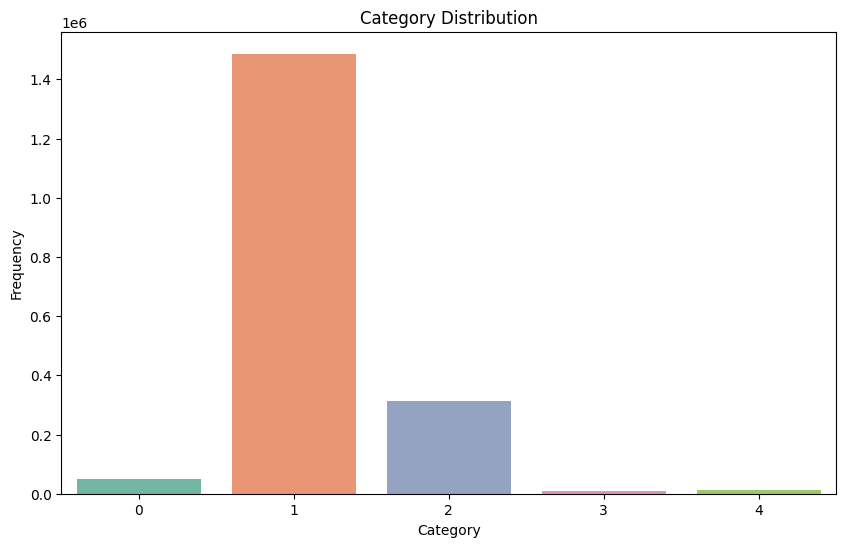

In [169]:
# Analyse the distribution of different payment types (payment_type).
# Calculate proportion of each quarter

df_trend=df_filtered.copy() 
payment_type = df_trend.groupby('payment_type')['total_amount'].sum().reset_index()
print(payment_type)
payment_proportions = df['payment_type'].value_counts(normalize=True)
print(payment_proportions)

plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=df, palette='Set2')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

#nearly 80% payments are by credit card and 17% are by cash 

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [170]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [171]:
 import geopandas as gpd

# Read the shapefile using geopandas
zones =  gpd.read_file("D:/Learnings/UpGrad/AI & ML main course/Site material/C1- SQL & Stats/4. EDA/New York taxi case/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

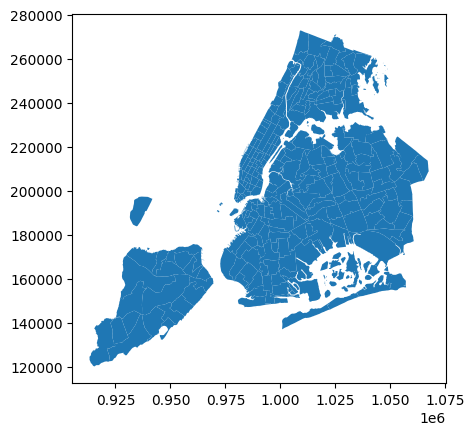

In [172]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [173]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(zones, df_filtered, left_on='LocationID', right_on='PULocationID', how='inner')
merged_df.head()

OBJECTID  Shape_Leng  Shape_Area           zone  LocationID    borough  \
0         4    0.043567    0.000112  Alphabet City           4  Manhattan   
1         4    0.043567    0.000112  Alphabet City           4  Manhattan   
2         4    0.043567    0.000112  Alphabet City           4  Manhattan   
3         4    0.043567    0.000112  Alphabet City           4  Manhattan   
4         4    0.043567    0.000112  Alphabet City           4  Manhattan   

                                            geometry  VendorID  \
0  POLYGON ((992073.467 203714.076, 992068.667 20...         1   
1  POLYGON ((992073.467 203714.076, 992068.667 20...         2   
2  POLYGON ((992073.467 203714.076, 992068.667 20...         2   
3  POLYGON ((992073.467 203714.076, 992068.667 20...         2   
4  POLYGON ((992073.467 203714.076, 992068.667 20...         2   

  tpep_pickup_datetime tpep_dropoff_datetime  ...  extra  mta_tax  tip_amount  \
0  2023-01-01 01:44:12   2023-01-01 01:56:41  ...    3.5      0.5        1.00   
1  2023-01-01 01:55:06   2023-01-01 02:12:59  ...    0.0      0.5        5.86   
2  2023-01-01 02:05:58   2023-01-01 02:28:31  ...    1.0      0.5        3.18   
3  2023-01-01 02:58:23   2023-01-01 03:12:23  ...    1.0      0.5        5.52   
4  2023-01-01 03:20:22   2023-01-01 03:28:10  ...    1.0      0.5        3.98   

  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0          0.0                    1.0         19.50                   2.5   
1          0.0                    1.0         35.16                   2.5   
2          0.0                    1.0         34.98                   2.5   
3          0.0                    1.0         33.12                   2.5   
4          0.0                    1.0         23.88                   2.5   

   airport_fees   trip_duration  trip_duration_min  
0           0.0 0 days 00:34:44          34.733333  
1           0.0 0 days 00:46:11          46.183333  
2           0.0 0 days 00:53:01          53.016667  
3           0.0 0 days 00:14:48          14.800000  
4           0.0 0 days 01:22:04          82.066667  

[5 rows x 28 columns]

In [199]:
merged_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1182668 entries, 0 to 1182667
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   OBJECTID               1182668 non-null  int32          
 1   Shape_Leng             1182668 non-null  float64        
 2   Shape_Area             1182668 non-null  float64        
 3   zone                   1182668 non-null  object         
 4   LocationID             1182668 non-null  int32          
 5   borough                1182668 non-null  object         
 6   geometry               1182668 non-null  geometry       
 7   VendorID               1182668 non-null  int64          
 8   tpep_pickup_datetime   1182668 non-null  datetime64[us] 
 9   tpep_dropoff_datetime  1182668 non-null  datetime64[us] 
 10  passenger_count        1182668 non-null  int32          
 11  trip_distance          1182668 non-null  float64        
 12  Rateco

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [174]:
# Group data by location and calculate the number of trips
no_of_trip = merged_df.groupby('LocationID').size().reset_index(name='num_trips')
print(no_of_trip)


     LocationID  num_trips
0             4       1557
1             7        161
2             9          1
3            10          4
4            12        353
..          ...        ...
170         258          1
171         260         15
172         261       5191
173         262      18941
174         263      26554

[175 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [175]:
# Merge trip counts back to the zones GeoDataFrame

zones_geo_df = pd.merge(zones, no_of_trip, left_on='LocationID', right_on='LocationID', how='inner')
zones_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    175 non-null    int32   
 1   Shape_Leng  175 non-null    float64 
 2   Shape_Area  175 non-null    float64 
 3   zone        175 non-null    object  
 4   LocationID  175 non-null    int32   
 5   borough     175 non-null    object  
 6   geometry    175 non-null    geometry
 7   num_trips   175 non-null    int64   
dtypes: float64(2), geometry(1), int32(2), int64(1), object(2)
memory usage: 9.7+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

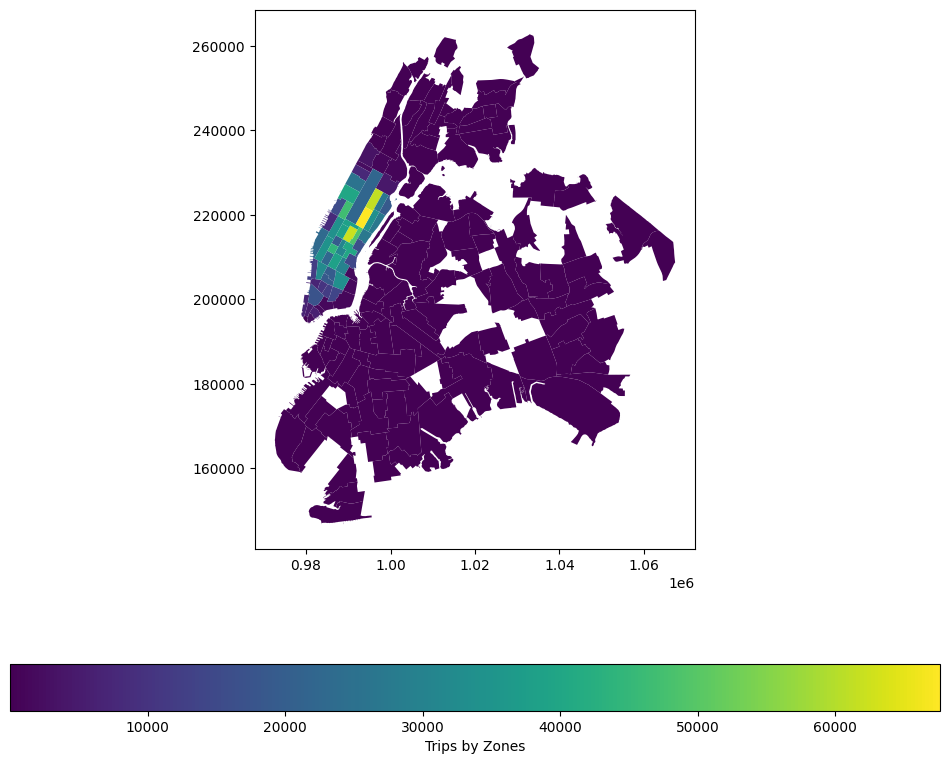

In [176]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

zones_geo_df.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Trips by Zones",
        'orientation': "horizontal"}
)

# Plot the map and display it
plt.show()

In [177]:
# can you try displaying the zones DF sorted by the number of trips?
zones_geo_df=zones_geo_df.sort_values(by='num_trips',ascending=False)
zones_geo_df.head(10)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
154       237    0.042213    0.000096         Upper East Side South   
104       161    0.035804    0.000072                Midtown Center   
153       236    0.044252    0.000103         Upper East Side North   
105       162    0.035270    0.000048                  Midtown East   
91        142    0.038176    0.000076           Lincoln Square East   
120       186    0.024696    0.000037  Penn Station/Madison Sq West   
113       170    0.045769    0.000074                   Murray Hill   
156       239    0.063626    0.000205         Upper West Side South   
151       234    0.036072    0.000073                      Union Sq   
106       163    0.034177    0.000041                 Midtown North   

     LocationID    borough                                           geometry  \
154         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
104         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
153         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
105         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
91          142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
120         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
113         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   
156         239  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...   
151         234  Manhattan  POLYGON ((987029.847 207022.299, 987048.27 206...   
106         163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...   

     num_trips  
154      67630  
104      62151  
153      61296  
105      48780  
91       46899  
120      44300  
113      40191  
156      40034  
151      38480  
106      38373

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

In [178]:
'''
The greater number of trips are in the Manhattan region of New York.
In Manhattan Highest also they are greatest in the Upper East Side South, Midtown Center, Upper East Side North zones.
Quarterly revenues are almost identical for all quarters but 2nd and 4th quarter top the chart.
We found strong correlation between distance and fare amount.
Descent correlation between tip and trip distance.
And low to almost no correlation for fare-trip duration, fare-passenger count.
'''

'\nThe greater number of trips are in the Manhattan region of New York.\nIn Manhattan Highest also they are greatest in the Upper East Side South, Midtown Center, Upper East Side North zones.\nQuarterly revenues are almost identical for all quarters but 2nd and 4th quarter top the chart.\nWe found strong correlation between distance and fare amount.\nDescent correlation between tip and trip distance.\nAnd low to almost no correlation for fare-trip duration, fare-passenger count.\n'

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [179]:
# Find routes which have the slowest speeds at different times of the day
df_clean=merged_df.copy()
df_clean = merged_df.dropna(subset=['trip_distance', 'trip_duration_min'])
df_clean = df_clean[(df_clean['trip_distance'] > 0) & (df_clean['trip_duration_min'] > 0)]
df_clean['hour'] = merged_df['tpep_pickup_datetime'].dt.hour
df_clean['route'] = merged_df['PULocationID'].astype(str) + '→' + merged_df['DOLocationID'].astype(str)

# Group by route and hour
grouped = df_clean.groupby(['route', 'hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_min': 'mean'
}).reset_index()

# Calculate average speed
grouped['avg_speed_mph'] = grouped['trip_distance'] / (grouped['trip_duration_min'] / 60)

# Sort by slowest speed
slowest_routes = grouped.sort_values(by='avg_speed_mph').reset_index(drop=True)
print(slowest_routes.head(10))

     route  hour  trip_distance  trip_duration_min  avg_speed_mph
0    97→97    16           0.01      132613.350000       0.000005
1  166→166     0           0.01      126848.466667       0.000005
2  246→246     6           0.03      134850.366667       0.000013
3  193→193    15           0.05      138178.050000       0.000022
4      4→4    22           0.06      125848.383333       0.000029
5  157→157     8           0.20      358049.250000       0.000034
6    49→49    14           0.12      193142.250000       0.000037
7  146→146     6           0.08      124847.416667       0.000038
8    88→88    14           0.15      189600.966667       0.000047
9  262→263     1           0.09      110355.833333       0.000049


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

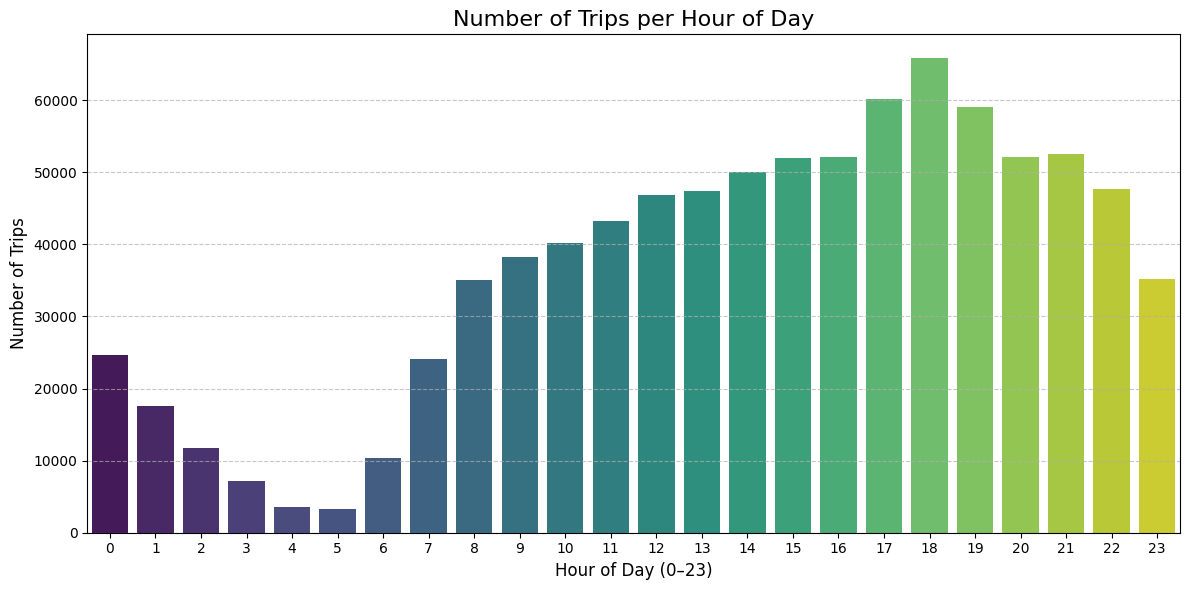

In [180]:
# Visualise the number of trips per hour and find the busiest hour
df_clean['hour'] = merged_df['tpep_pickup_datetime'].dt.hour

# Count number of trips per hour
trips_per_hour = df_clean['hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')

plt.title('Number of Trips per Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

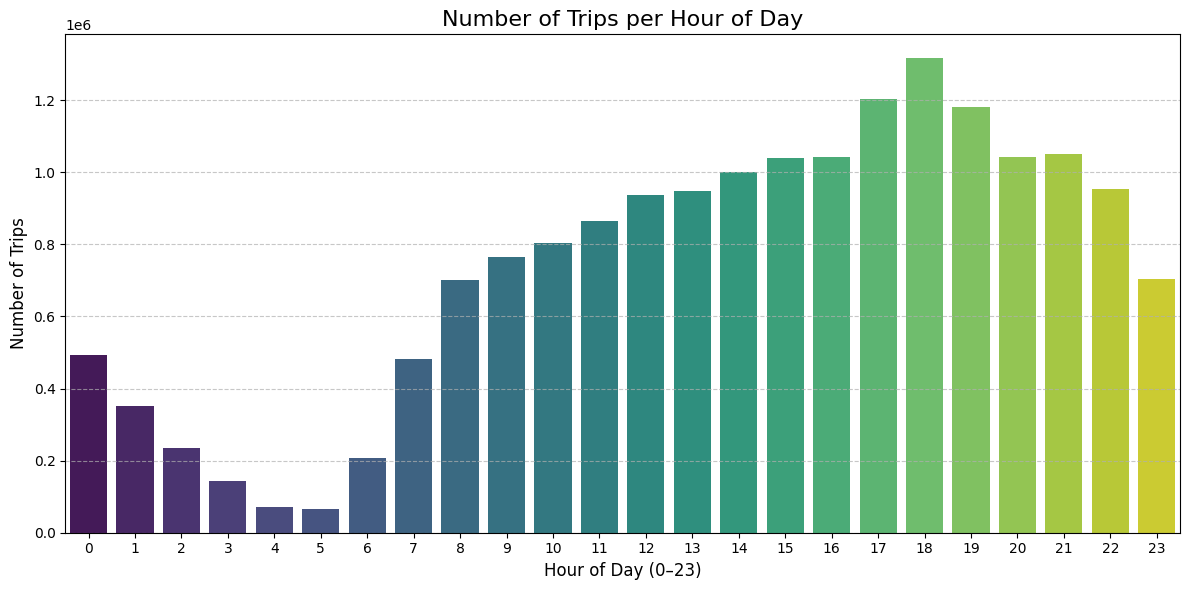

In [181]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05 

# extracting hour
df_clean['hour'] = merged_df['tpep_pickup_datetime'].dt.hour

# Count number of trips per hour
trips_per_hour = df_clean['hour'].value_counts().sort_index()
trips_per_hour_estimated = trips_per_hour / sample_fraction # sclaing up by since we had taken only 5% samples 
plt.figure(figsize=(12,6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour_estimated.values, palette='viridis')

plt.title('Number of Trips per Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

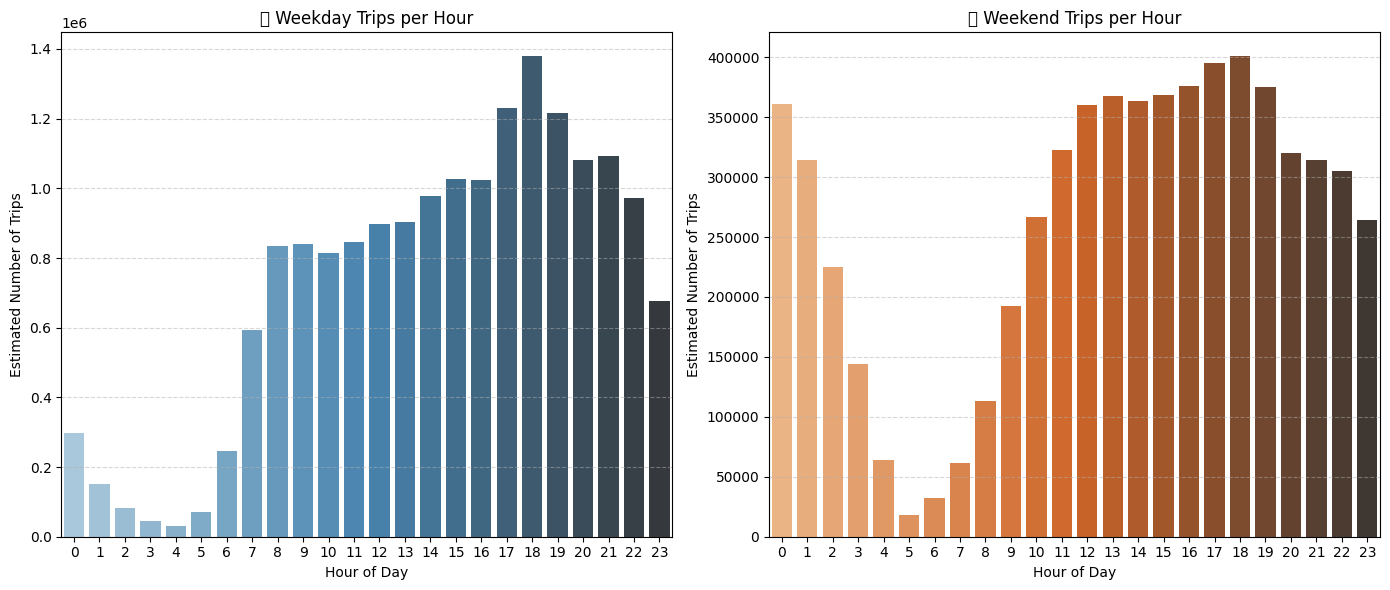

In [182]:
# Compare traffic trends for the week days and weekends
# Extract hour and day of week (0 = Monday, 6 = Sunday)
df_clean=merged_df.copy()
df_clean['hour'] = df_clean['tpep_pickup_datetime'].dt.hour
df_clean['dayofweek'] = df_clean['tpep_pickup_datetime'].dt.dayofweek

# Define weekday and weekend masks
weekday_df = df_clean[df_clean['dayofweek'] < 5]    # Monday to Friday
weekend_df = df_clean[df_clean['dayofweek'] >= 5]   # Saturday and Sunday

weekday_trips = weekday_df['hour'].value_counts().sort_index() / sample_fraction
weekend_trips = weekend_df['hour'].value_counts().sort_index() / sample_fraction

plt.figure(figsize=(14,6))

# Plot weekday
plt.subplot(1, 2, 1)
sns.barplot(x=weekday_trips.index, y=weekday_trips.values, palette='Blues_d')
plt.title('🚗 Weekday Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Plot weekend
plt.subplot(1, 2, 2)
sns.barplot(x=weekend_trips.index, y=weekend_trips.values, palette='Oranges_d')
plt.title('🌴 Weekend Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [183]:
'''
Weekday trips are higher than weekend trips overall
Both show similar pattern for identical hours of day exception being on weekend between 12am to 4am also we can see higher trip counts compared to
weekdays. The reason could be people relaxing and partying on weekends so staying up late and commuting to clubs, returning homes etc.
On weekdays people staring their day at 6am to 8 am are higher than weekends. This might be that they want to start late so as to take a little 
rest from the week days work.
'''

'\nWeekday trips are higher than weekend trips overall\nBoth show similar pattern for identical hours of day exception being on weekend between 12am to 4am also we can see higher trip counts compared to\nweekdays. The reason could be people relaxing and partying on weekends so staying up late and commuting to clubs, returning homes etc.\nOn weekdays people staring their day at 6am to 8 am are higher than weekends. This might be that they want to start late so as to take a little \nrest from the week days work.\n'

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [201]:
merged_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1182668 entries, 0 to 1182667
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   OBJECTID               1182668 non-null  int32          
 1   Shape_Leng             1182668 non-null  float64        
 2   Shape_Area             1182668 non-null  float64        
 3   zone                   1182668 non-null  object         
 4   LocationID             1182668 non-null  int32          
 5   borough                1182668 non-null  object         
 6   geometry               1182668 non-null  geometry       
 7   VendorID               1182668 non-null  int64          
 8   tpep_pickup_datetime   1182668 non-null  datetime64[us] 
 9   tpep_dropoff_datetime  1182668 non-null  datetime64[us] 
 10  passenger_count        1182668 non-null  int32          
 11  trip_distance          1182668 non-null  float64        
 12  Rateco

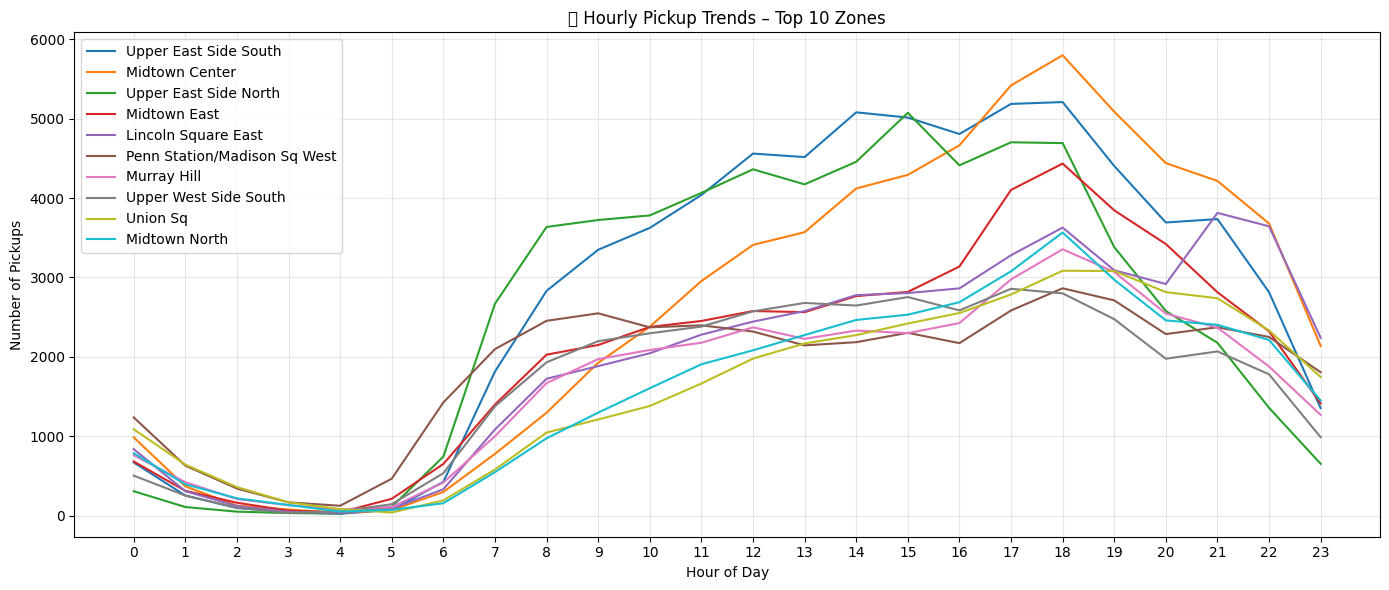

In [202]:
# Find top 10 pickup and dropoff zones
df_clean=merged_df.copy()
df_clean['hour'] = df_clean['tpep_pickup_datetime'].dt.hour
zone_lookup = df_clean[['LocationID', 'zone']].drop_duplicates().set_index('LocationID')['zone'].to_dict()

# Count pickups by PULocationID and hour
pickup_counts = df_clean.groupby(['PULocationID', 'hour']).size().reset_index(name='pickup_count')

# Map zone names
pickup_counts['zone'] = pickup_counts['PULocationID'].map(zone_lookup)

# Total pickups per zone
pickup_totals = pickup_counts.groupby('zone')['pickup_count'].sum().reset_index()

# Get top 10 zones by pickup volume
top_10_pickup_zones = pickup_totals.nlargest(10, 'pickup_count')['zone'].tolist()


plt.figure(figsize=(14, 6))

# Filter top pickup zones
pickup_top = pickup_counts[pickup_counts['zone'].isin(top_10_pickup_zones)]

# Plot each zone's hourly trend
for zone in top_10_pickup_zones:
    hourly = pickup_top[pickup_top['zone'] == zone]
    plt.plot(hourly['hour'], hourly['pickup_count'], label=zone)

plt.title('📈 Hourly Pickup Trends – Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

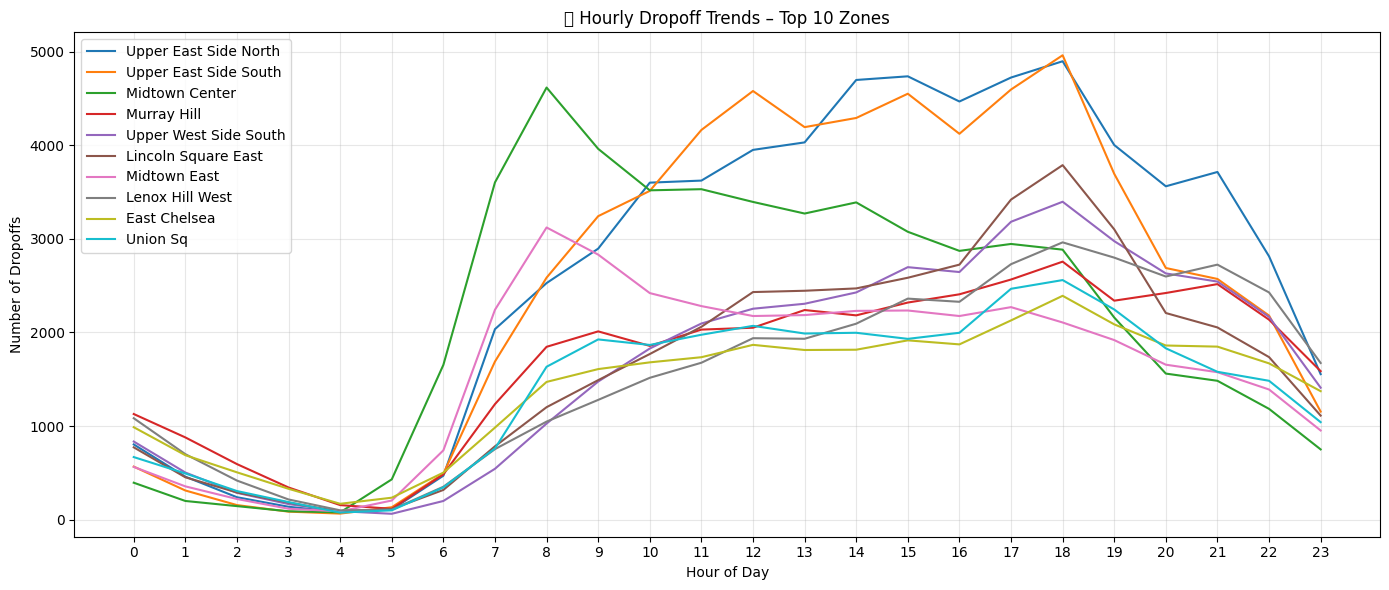

In [203]:
df_clean=merged_df.copy()
df_clean['hour'] = df_clean['tpep_pickup_datetime'].dt.hour
zone_lookup = df_clean[['LocationID', 'zone']].drop_duplicates().set_index('LocationID')['zone'].to_dict()

# Count dropoffs by DOLocationID and hour
dropoff_counts = df_clean.groupby(['DOLocationID', 'hour']).size().reset_index(name='dropoff_count')

# Map zone names
dropoff_counts['zone'] = dropoff_counts['DOLocationID'].map(zone_lookup)

# Total dropoffs per zone
dropoff_totals = dropoff_counts.groupby('zone')['dropoff_count'].sum().reset_index()

# Get top 10 zones by dropoff volume
top_10_dropoff_zones = dropoff_totals.nlargest(10, 'dropoff_count')['zone'].tolist()

plt.figure(figsize=(14, 6))

# Filter top dropoff zones
dropoff_top = dropoff_counts[dropoff_counts['zone'].isin(top_10_dropoff_zones)]

# Plot each zone's hourly trend
for zone in top_10_dropoff_zones:
    hourly = dropoff_top[dropoff_top['zone'] == zone]
    plt.plot(hourly['hour'], hourly['dropoff_count'], label=zone)

plt.title('📈 Hourly Dropoff Trends – Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(24))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [205]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zone_lookup = merged_df[['LocationID', 'zone']].drop_duplicates().set_index('LocationID')['zone'].to_dict()
# Count total pickups per PULocationID
pickup_counts = merged_df.groupby('PULocationID').size().reset_index(name='pickup_count')
pickup_counts['zone'] = pickup_counts['PULocationID'].map(zone_lookup)

# Count total dropoffs per DOLocationID
dropoff_counts = merged_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
dropoff_counts['zone'] = dropoff_counts['DOLocationID'].map(zone_lookup)

# Merge on zone
zone_activity = pd.merge(pickup_counts[['zone', 'pickup_count']],
                         dropoff_counts[['zone', 'dropoff_count']],
                         on='zone', how='outer').fillna(0)

zone_activity['pickup_drop_ratio'] = zone_activity['pickup_count'] / (zone_activity['dropoff_count'] + 1e-5)


# Highest pickup-to-dropoff ratios (source zones)
top10_ratios = zone_activity.sort_values(by='pickup_drop_ratio', ascending=False).head(10)

# Lowest pickup-to-dropoff ratios (sink zones)
bottom10_ratios = zone_activity.sort_values(by='pickup_drop_ratio').head(10)

print("Top 10 Pickup-to-Dropoff Ratios:\n", top10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']])
print("\n Bottom 10 Pickup-to-Dropoff Ratios:\n", bottom10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']])

Top 10 Pickup-to-Dropoff Ratios:
                           zone  pickup_count  dropoff_count  pickup_drop_ratio
139  Springfield Gardens South           2.0            0.0           200000.0
39                  Douglaston           1.0            0.0           100000.0
2                   Auburndale           1.0            0.0           100000.0
76                Howard Beach           1.0            0.0           100000.0
75           Hillcrest/Pomonok           1.0            0.0           100000.0
32                Coney Island           1.0            0.0           100000.0
7      Bay Terrace/Fort Totten           1.0            0.0           100000.0
119             Pelham Parkway           1.0            0.0           100000.0
34           Crotona Park East           1.0            0.0           100000.0
118                Parkchester           1.0            0.0           100000.0

 Bottom 10 Pickup-to-Dropoff Ratios:
     zone  pickup_count  dropoff_count  pickup_drop_ratio
2

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [187]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [188]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [208]:
# Analyse the fare per mile per passenger for different passenger counts
df_valid=merged_df.copy()
df_valid['fare_per_mile_per_passenger'] = (df_valid['fare_amount'] / df_valid['trip_distance']) / df_valid['passenger_count']

avg_fare_by_passenger = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(avg_fare_by_passenger.sort_values('passenger_count'))

   passenger_count  fare_per_mile_per_passenger
0                1                     8.362055
1                2                     4.146383
2                3                     2.788896
3                4                     2.070385
4                5                     1.609999
5                6                     1.366138


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [222]:
# Compare fare per mile for different vendors
df_valid=merged_df.copy()
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour
df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_valid['day_name'] = df_valid['day_of_week'].map(day_map)

#fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

#Average fare per mile by hour
avg_fare_by_hour = df_valid.groupby('hour')['fare_per_mile'].mean().reset_index()

#Average fare per mile by day of week
avg_fare_by_day = df_valid.groupby('day_name')['fare_per_mile'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']).reset_index()

avg_fare_by_hour_sorted = avg_fare_by_hour.sort_values(by='fare_per_mile', ascending=False).reset_index(drop=True)
avg_fare_by_day_sorted = avg_fare_by_day.sort_values(by='fare_per_mile', ascending=False).reset_index(drop=True)

print(avg_fare_by_hour_sorted)
print(avg_fare_by_day_sorted)

'''
At 3pm the fare per mile is greatest and at 4am it is least.
On thursday the fare per mile is greatest and on Sunday it is least.
'''

    hour  fare_per_mile
0     15       9.272524
1     12       9.181634
2     14       9.137303
3     13       9.103846
4     16       9.056695
5     11       9.048698
6     17       8.981044
7     10       8.675958
8     18       8.634075
9     19       8.594209
10     9       8.554992
11     8       8.172914
12    20       7.684037
13    21       7.390430
14     7       7.373224
15    22       7.296695
16    23       7.158811
17     0       6.995058
18     6       6.833267
19     5       6.816531
20     1       6.808485
21     3       6.768953
22     2       6.633092
23     4       6.373360
  day_name  fare_per_mile
0      Thu       8.743260
1      Wed       8.692913
2      Tue       8.627448
3      Fri       8.362435
4      Mon       8.086248
5      Sat       8.076555
6      Sun       7.581980


'\nAt 3pm the fare per mile is greatest and at 4am it is least.\nOn thursday the fare per mile is greatest and on Sunday it is least.\n'

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

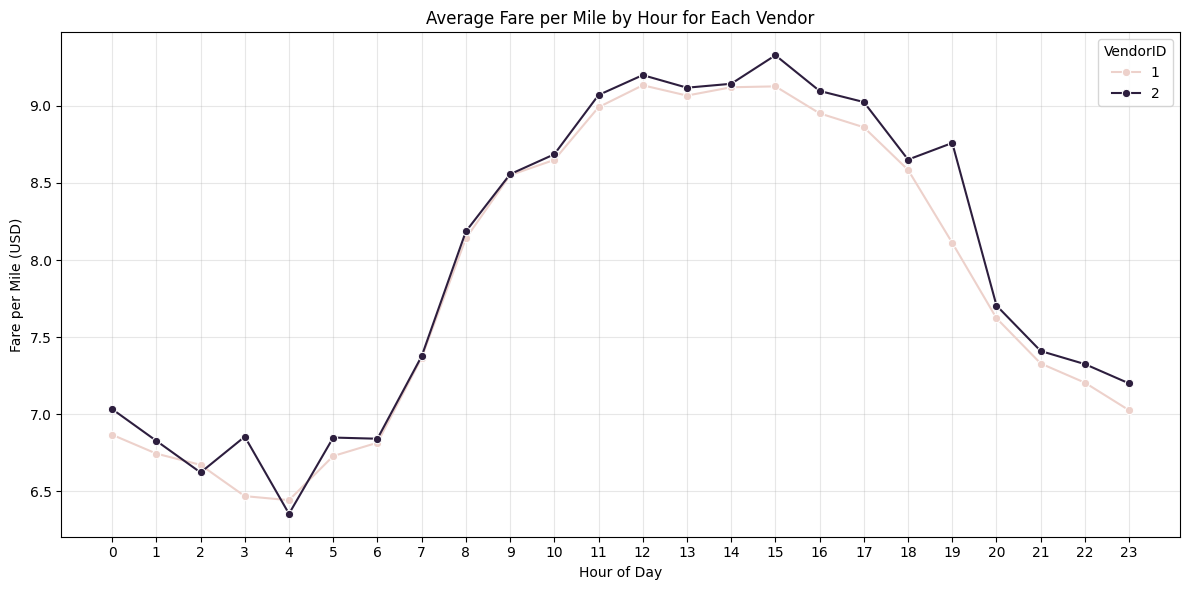

' Vendor Curb Mobility LLC has high average fare than Creative Mobile Technologies for almost all hours except 6 to 10 am where it is same '

In [223]:
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']
vendor_hourly_fare = (
    df_valid.groupby(['VendorID', 'hour'])['fare_per_mile']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly_fare, x='hour', y='fare_per_mile', hue='VendorID', marker='o')

plt.title('Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


''' Vendor Curb Mobility LLC has high average fare than Creative Mobile Technologies for almost all hours except 6 to 10 am where it is same '''

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


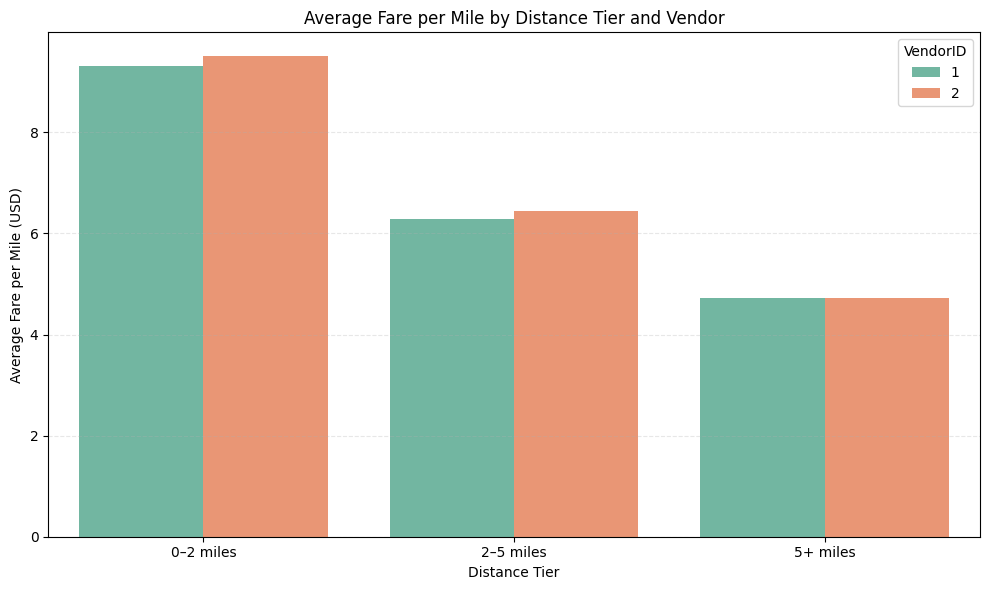

In [218]:
# Defining distance tiers
def categorize_distance(dist):
    if dist <= 2:
        return '0–2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

df_valid['distance_tier'] = df_valid['trip_distance'].apply(categorize_distance)

tiered_fare = (
    df_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='Set2')

plt.title('Average Fare per Mile by Distance Tier and Vendor')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

''' 
Vendor Curb Mobility LLC has high average fare per mile than Creative Mobile Technologies for 0-2 miles, 2-5 miles but for 5+ miles it is same.

'''

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [230]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

def distance_bucket(d):
    if d <= 1:
        return '0–1 mi'
    elif d <= 3:
        return '1–3 mi'
    elif d <= 5:
        return '3–5 mi'
    elif d <= 10:
        return '5–10 mi'
    else:
        return '10+ mi'

df_valid['distance_bucket'] = df_valid['trip_distance'].apply(distance_bucket)
df_valid['tip_percent'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100

tip_by_distance = df_valid.groupby('distance_bucket')['tip_percent'].mean().reset_index()
tip_by_passenger = df_valid.groupby('passenger_count')['tip_percent'].mean().reset_index()
df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour

tip_perc_by_distance = df_valid.groupby('distance_bucket')['tip_percent'].mean().reset_index().sort_values(by='tip_percent', ascending=False).reset_index(drop=True)
tip_perc_by_passenger = df_valid.groupby('passenger_count')['tip_percent'].mean().reset_index().sort_values(by='tip_percent', ascending=False).reset_index(drop=True)
tip_perc_by_hour = df_valid.groupby('pickup_hour')['tip_percent'].mean().reset_index().sort_values(by='tip_percent', ascending=False).reset_index(drop=True)

print(tip_perc_by_distance)
print(tip_perc_by_passenger)
print(tip_perc_by_hour)

'''
For 0-1 mile receives better share of tips. For higher distance journeys the tips get decreasing.
passenger count doesn't much have any relation to tips share received.

In busiest hours generally get good share of tips. 6pm is busiest we knew which got highest tips share.
But in all hours the tip share is similar.

'''

  distance_bucket  tip_percent
0          0–1 mi    31.917977
1          1–3 mi    25.392221
2          3–5 mi    21.614505
3          10+ mi    19.032946
4         5–10 mi    18.553113
   passenger_count  tip_percent
0                2    26.497917
1                4    26.489338
2                6    26.471478
3                5    26.465123
4                3    26.359226
5                1    26.358760
    pickup_hour  tip_percent
0            18    27.917675
1            19    27.865806
2            17    27.711584
3            16    27.661187
4             5    27.423502
5            20    26.871709
6            21    26.682594
7             4    26.658454
8             3    26.448507
9            22    26.423841
10            2    26.333085
11           23    26.264372
12            1    26.199641
13            0    26.132602
14           10    25.685020
15           11    25.588005
16           13    25.585239
17           12    25.518611
18           14    25.462767
19        

"\nFor 0-1 mile receives better share of tips. For higher distance journeys the tips get decreasing.\npassenger count doesn't much have any relation to tips share received.\n\nIn busiest hours generally get good share of tips. 6pm is busiest we knew which got highest tips share.\nBut in all hours the tip share is similar.\n\n"

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [232]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip = df_valid[df_valid['tip_percent'] < 10]
high_tip = df_valid[df_valid['tip_percent'] > 25]
low_summary = low_tip[['trip_distance', 'passenger_count', 'fare_amount']].mean()
high_summary = high_tip[['trip_distance', 'passenger_count', 'fare_amount']].mean()

comparison = pd.DataFrame({
    'Low Tip (<10%)': low_summary,
    'High Tip (>25%)': high_summary
})
print(comparison)

                 Low Tip (<10%)  High Tip (>25%)
trip_distance          2.649735         1.514423
passenger_count        1.341865         1.357950
fare_amount           17.574412        11.314361


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<class 'pandas.core.frame.DataFrame'>
Index: 1874281 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fees           floa

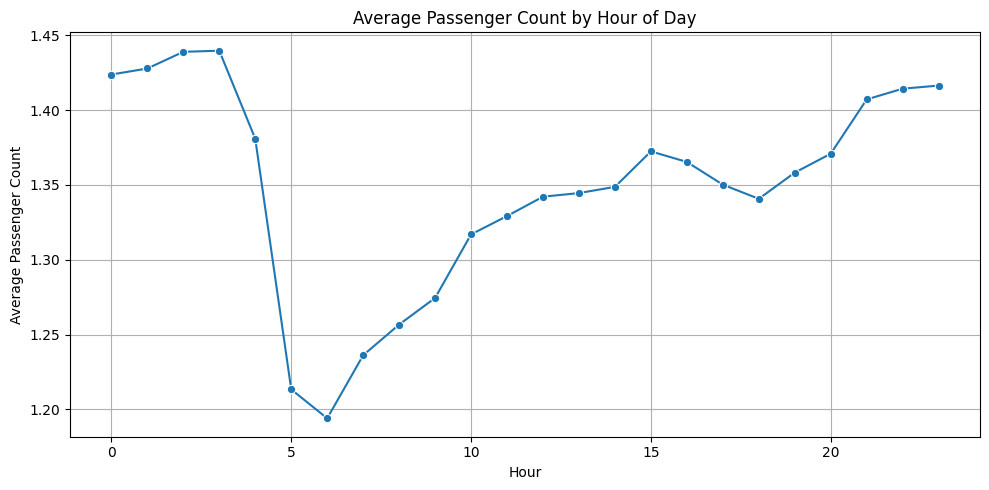

In [239]:
# See how passenger count varies across hours and days
df.info()

df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
hourly_passenger = df_clean.groupby('pickup_hour')['passenger_count'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_passenger, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()


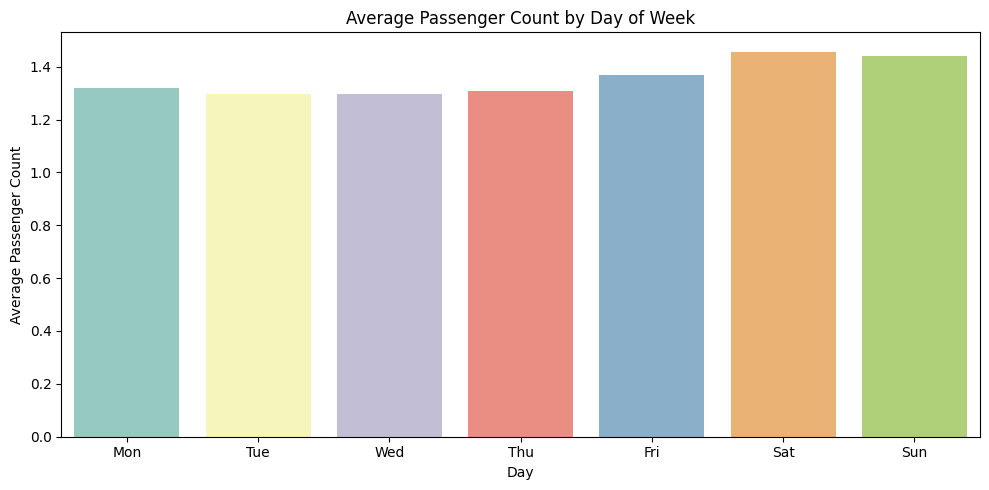

In [241]:
df_clean['day_of_week'] = df_clean['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_clean['day_name'] = df_clean['day_of_week'].map(day_map)

daily_passenger = df_clean.groupby('day_name')['passenger_count'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=daily_passenger, x='day_name', y='passenger_count', palette='Set3')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Passenger Count')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

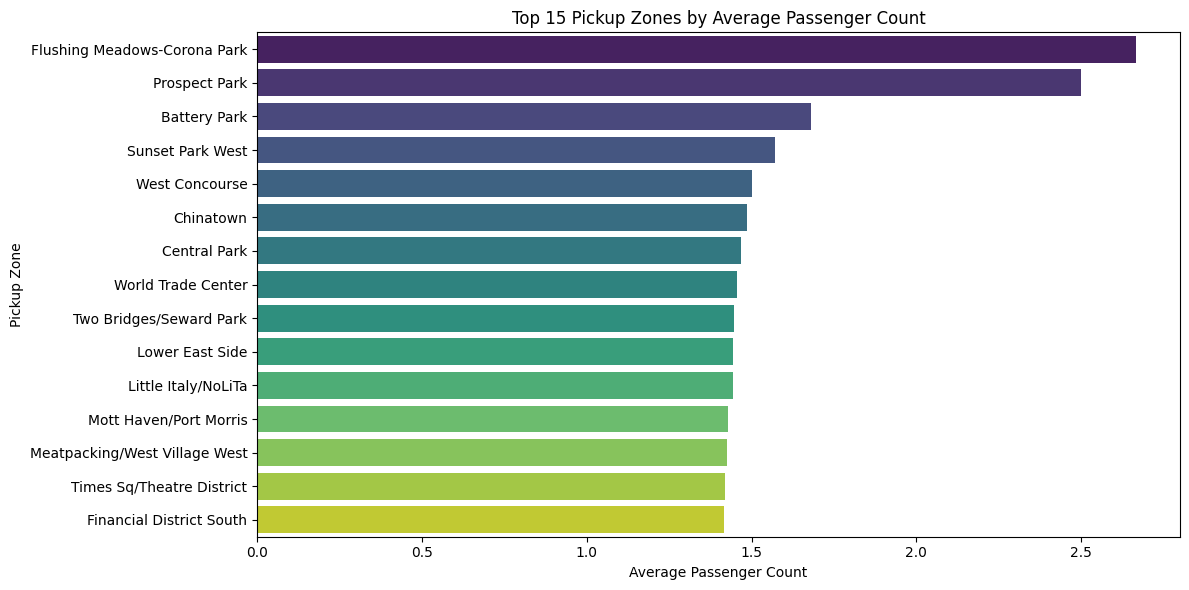

In [245]:
# How does passenger count vary across zones


zone_passenger = df_clean.groupby('zone')['passenger_count'].mean().sort_values(ascending=False).reset_index()
top_zones = zone_passenger.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zones, x='passenger_count', y='zone', palette='viridis')
plt.title('Top 15 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

In [248]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

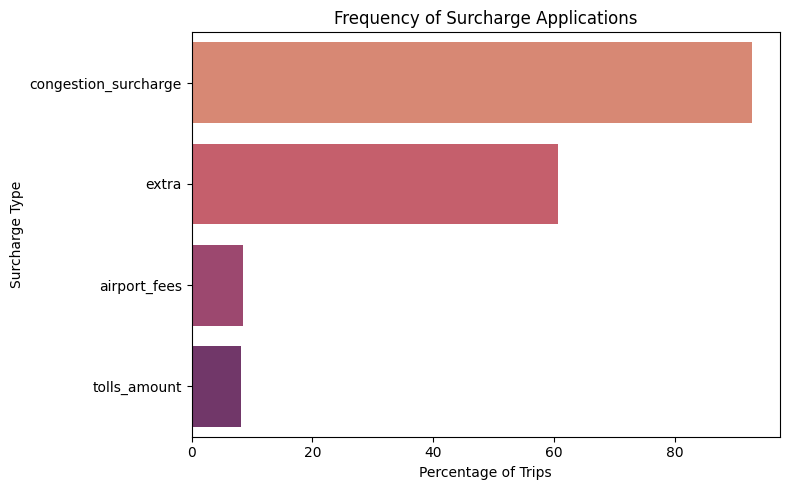

In [249]:
# How often is each surcharge applied?

surcharge_flags = {
    'extra': df['extra'] > 0,
    'tolls_amount': df['tolls_amount'] > 0,
    'congestion_surcharge': df['congestion_surcharge'] > 0,
    'airport_fees': df['airport_fees'] > 0
}

surcharge_freq = {
    k: v.mean() * 100  # percentage
    for k, v in surcharge_flags.items()
}

surcharge_df = pd.DataFrame(list(surcharge_freq.items()), columns=['Surcharge', 'Applied (%)'])
surcharge_df = surcharge_df.sort_values('Applied (%)', ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(data=surcharge_df, x='Applied (%)', y='Surcharge', palette='flare')
plt.title('Frequency of Surcharge Applications')
plt.xlabel('Percentage of Trips')
plt.ylabel('Surcharge Type')
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [253]:
'''

•	The slow routes are those where pickup and drop locations are same but there is absurdity which might be because of improper pickup and drop time 
    of taxi system.

•	The fare per mile per passenger is high for single passenger and decreases for higher count of passenger so 

•	During office hours the taxi availability should be high so as to make business.
    Busy business hours are 11am to 10 pm with 6pm being the busiest. It is when people return home from their workplaces.

'''

'\n\nThe slow routes are those where pickup and drop locations are same but there is absurdity which might be because of improper pickup and drop time \nof taxi system.\n\nThe fare per mile per passenger is high for single passenger and decreases for higher count of passenger so \n\nDuring office hours the taxi availability should be high so as to make business.\nBusy business hours are 11am to 10 pm with 6pm being the busiest. It is when people return home from their workplaces.\n\n'

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [254]:
'''

•	Weekday trips are higher than weekend trips overall.
	Both show similar pattern for identical hours of day exception being on weekend between 12am to 4am also we can see higher trip counts 
    compared to weekdays. 
    The reason could be people relaxing and partying on weekends so staying up late and commuting to clubs, returning homes etc.
so it makes sense to deploy taxis in these weekend late hours.

•	People staring their day at 6am to 8 am on weekdays are higher than weekends. 
    On weekends it might be that they people to start late so as to take a little rest from the week days work.
so it again makes sense to deploy taxis from early hours on weekdays but few hours late on weekends.

•	Upper east side north ,Upper east side south, Midtown center are the top 3 zones showing highest number of passenger pickup and drops.


'''

'\n•\tWeekday trips are higher than weekend trips overall.\n\tBoth show similar pattern for identical hours of day exception being on weekend between 12am to 4am also we can see higher trip counts compared to weekdays. \n    The reason could be people relaxing and partying on weekends so staying up late and commuting to clubs, returning homes etc.\nso it makes sense to deploy taxis in these weekend late hours.\n\n•\tPeople staring their day at 6am to 8 am on weekdays are higher than weekends. \n    On weekends it might be that they people to start late so as to take a little rest from the week days work.\nso it again makes sense to deploy taxis from early hours on weekdays but few hours late on weekends.\n\nUpper east side north ,Upper east side south, Midtown center are the top 3 zones showing highest number of passenger pickup and drops.\n\n'

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [252]:
'''
•	Deploy high taxi fleets in Manhattan.

•	The fare per mile per passenger is high for single passenger and decreases for higher count of passenger so we can consider 
    averaging the price such that we give some discount to single travellers and charge high for multiple passenger commuting in same taxi.

•	At 3pm the fare per mile is greatest and at 4am it is least. So we can levy night travel charge
    On thursday the fare per mile is greatest and on Sunday it is least.

•	Vendor Curb Mobility LLC has high average fare than Creative Mobile Technologies for almost all hours except 6 to 10 am where it is same.
    Vendor Curb Mobility LLC has high average fare per mile than Creative Mobile Technologies for 0-2 miles, 2-5 miles but for 5+ miles it is same.
So set pricing strategy as close to these vendors but slightly discounted to maximize revenue and remain competitive.
Deploy more taxi fleet because we saw for shorter distance receives more tips because customer satisfaction could be higher for quick trip completions.

•	Average passenger count drops at 4-6am but starts increasing after that so maintain high availability before 4pm and after 6pm.
    Average passenger count is high on Friday and weekends so ensure high availability, could be because people find time and
    love to socialize on those days.

•	Flushing meadows corona park and prospect park shown highest avg passenger count when it comes to top pickup zones. 
    These are beloved destinations for couples seeking romantic and memorable outings. so maintain high availability around these parks as well.

'''

'\nDeploy high taxi fleets in Manhattan.\n\nThe fare per mile per passenger is high for single passenger and decreases for higher count of passenger so we can consider \naveraging the price such that we give some discount to single travellers and charge high for multiple passenger commuting in same taxi.\n\nAt 3pm the fare per mile is greatest and at 4am it is least. So we can levy night travel charge\nOn thursday the fare per mile is greatest and on Sunday it is least.\n\nVendor Curb Mobility LLC has high average fare than Creative Mobile Technologies for almost all hours except 6 to 10 am where it is same.\nVendor Curb Mobility LLC has high average fare per mile than Creative Mobile Technologies for 0-2 miles, 2-5 miles but for 5+ miles it is same.\nSo set pricing strategy as close to these vendors but slightly discounted to maximize revenue and remain competitive.\nDeploy more taxi fleet because we saw for shorter distance receives more tips because customer satisfaction could be hi